<a href="https://colab.research.google.com/github/LSENeutralNetwork/Artificial-Intelligence-Deep-Learning/blob/master/Assignment_1_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
Candidate Number: 43335

**Task:** evaluate and plot the average loss per epoch versus the number of epoches for the training dataset, for the following optimization algorithms:

*   Mini-batch gradient descent
*   Mini-batch AdaGrad
*   Mini-batch gradient descent with Nesterov’s momentum (momentum = 0.7)
*   Mini-batch Adam

# 1.1 Load TensorFlow and Libraries

In [0]:
# Load Correct Version of TensorFlow
import tensorflow as tf
%tensorflow_version 1.x
tf.logging.set_verbosity(tf.logging.INFO)

# Load Libraries, Data and Set Seed
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(1)

# 1.2 Functions for Plot Loss and MNIST Classification

In [0]:
# Functions
def plot_loss(lossGD, lossADA, lossNest, lossAdam):
  plt.plot(lossGD, label='Gradient Descent')
  plt.plot(lossADA, label='AdaGrad')
  plt.plot(lossNest, label='GD with Nesterovs Momentum')
  plt.plot(lossAdam, label='Adam')
  plt.xlabel('Number of Epoches')
  plt.ylabel('Cross Entropy Loss')
  plt.title('Average Loss per Epoch for Different Optimisers')
  plt.legend()
  plt.show()

def MNIST_classification(num_epoches):
  # Read the MNIST Data
  mnist = input_data.read_data_sets("mnist", one_hot=False)
  
  # Import Training and Test Sets and the Coresponding Labels
  training_set = mnist.train.images
  training_labels = np.asarray(mnist.train.labels, dtype=np.int32)
  test_set = mnist.test.images
  test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

  # Set Hyper-parameters
  x_dim = 784
  num_classes = 10
  batch_size = 128
  num_epoches = num_epoches # 45 in this problem
  n_batches = np.floor(mnist.train.num_examples/ batch_size).astype(int)
  starting_learning_rate = 0.001
  momentum = 0.7
  lambdaweight = 0.01
  # Set Random Value Initialisers
  init_w = tf.constant(np.random.randn(x_dim, num_classes) * 0.1, dtype=tf.float32)
  init_b = tf.constant(np.random.randn(num_classes) * 0.1, dtype=tf.float32)

  # Set Variable Scope
  with tf.variable_scope('main', reuse=tf.AUTO_REUSE):
    # Placeholders
    x = tf.placeholder(tf.float32, [batch_size, x_dim])
    y = tf.placeholder(tf.int32, [batch_size,])
    learning_rate = tf.placeholder(tf.float32)
    # Variables
    w = tf.get_variable(name='w', initializer=init_w, dtype=tf.float32)
    b = tf.get_variable(name='b', initializer=init_b, dtype=tf.float32)
    # Define Model
    logits = tf.add(tf.matmul(x, w), b)
    # Define L2 Regularized Loss
    normal_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))
    L2regularizer = tf.nn.l2_loss(w)
    reg_loss = normal_loss + lambdaweight * L2regularizer
    # Optimisers using Regularized Loss
    optimiserGD = tf.train.GradientDescentOptimizer(learning_rate).minimize(reg_loss)
    optimiserADA = tf.train.AdagradOptimizer(learning_rate, name='Adagrad').minimize(reg_loss)
    optimiserNest = tf.train.MomentumOptimizer(learning_rate, momentum=momentum, use_nesterov=True, name='Momentum').minimize(reg_loss)
    optimiserAdam = tf.train.AdamOptimizer(learning_rate).minimize(reg_loss)

  # Calculating Average Loss per Epoch for 4 Optimizers

  # Track Average Loss per Epoch in a list
  avg_loss_list = []

  # Optimiser For Loop
  for optimiser in [optimiserGD, optimiserADA, optimiserNest, optimiserAdam]:
    with tf.Session() as sess:
      # Initialise global variables
      sess.run(tf.global_variables_initializer())
      # Initialise local variables
      sess.run(tf.local_variables_initializer())
      print("Start", optimiser)
      # Epoch For Loop
      for epoch in range(num_epoches):
        new_lr = starting_learning_rate / math.sqrt(epoch+1)
        loss_within_epoch = []
        # Minibatch For Loop
        for minibatch in range(n_batches):
          batch_x, batch_y = mnist.train.next_batch(batch_size)
          _, l = sess.run([optimiser, reg_loss], feed_dict={x: batch_x, y: batch_y, learning_rate: new_lr})
          loss_within_epoch.append(l)
            
        avg_loss_list.append(np.mean(loss_within_epoch))
        if ((epoch + 1) % 5 == 0):
          print("Epoch:", (epoch + 1), "average loss =", "{:.3f}".format(np.mean(loss_within_epoch)))

  # Reshape the loss list to discern between the 4 different optimisers
  avg_loss_list = np.reshape(avg_loss_list, (-1, num_epoches))
  # Plot the average loss per epoch for the 4 different optimisers
  plot_loss(avg_loss_list[0, :], avg_loss_list[1, :], avg_loss_list[2, :], avg_loss_list[3, :])

  return avg_loss_list

# 1.3 Call Function and Analyse Plot for Average Loss per Epoch

I'm printing average loss per epoch for each 5th epoch and then a plot is made for the average loss per epoch for the 4 different optimisers:

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Start name: "main_1/GradientDescent"
op: "NoOp"
input: "^main_1/GradientDescent/update_main/w/ApplyGradientDescent"
input: "^main_1/GradientDescent/update_main/b/ApplyGradientDescent"

Epoch: 5 average loss = 1.912
Epoch: 10 average loss = 1.634
Epoch: 15 average loss = 1.496
Epoch: 20 average loss = 1.409
Epoch: 25 average loss = 1.350
Epoch: 30 average loss = 1.305
Epoch: 35 average loss = 1.269
Epoch: 40 average loss = 1.237
Epoch: 45 average loss = 1.212
Start name: "main_1/Adagrad"
op: "NoOp"
input: "^main_1/Adagrad/update_main/w/ApplyAdagrad"
input: "^main_1/Adagrad/update_main/b/ApplyAdagrad"

Epoch: 5 average loss = 1.713
Epoch: 10 average loss = 1.523
Epoch: 15 average loss = 1.433
Epoch: 20 average loss = 1.375
Epoch: 25 average loss = 1.333
Epoch: 30 average loss = 1.305
Epoch: 35 average loss = 1.278
Ep

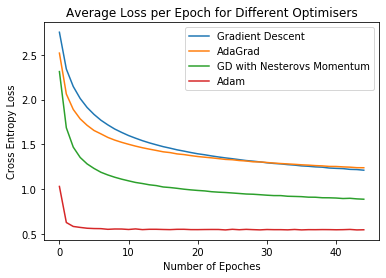

In [0]:
# MNIST classification using multi-class logistic regression
MNIST_loss_list = MNIST_classification(45)

**Question**: Discuss how the performances of different optimization algorithms compare to each other.

**Answer**: 
- As can be inferred from the plot, the Adam optimiser performs the best with high reduction in loss at the start and a flattening decrease rate around epoch 5 (depending on the learning rate). Compared to the other three optimisers, the Adam optimiser seems superior as it both starts and ends and ends with a lower loss than the other three.

- The Gradient Descent with Nesterov's Momentum (=0.7) has the next best performance. While starting out with a higher loss at epoch 1 (closer to Gradient Descent and AdaGrad), the rate of loss decrease is significantly better for GD with Nesterov's Momentum and its loss at the end is in the middle between (1) the Adam Optimiser and (2) Gradient Descent/AdaGrad.

- AdaGrad has a lower loss in the beginning than Gradient Descent in the beginning and also a higher rate of loss decrease up until epoch 10 where it flattens more for AdaGrad. From there onwards, Gradient Descent performs slightly better from epoch 30 onwards where it overtakes AdaGrad.